In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import winsound
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from Python_Files.Methods import make_mi_scores, get_df_info, plot_mi_scores

In [2]:
df = pd.read_csv('../data/norm_data.csv')

df

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,legitimate,0.000705,0,0.579949,0,0.000000,0.004739,0.00000,0.000000,0.000000,0,0.000000,0.098607,0,0.117586
1,legitimate,0.000862,0,0.577608,0,0.000000,0.009479,0.00000,0.000000,0.000000,0,0.023256,0.142089,0,0.098571
2,phishing,0.001920,0,0.691708,0,0.000000,0.009479,0.00000,0.009317,0.000000,0,0.023256,0.267494,0,0.001779
3,phishing,0.001567,0,0.717986,0,0.008569,0.009479,0.00000,0.009317,0.000000,0,0.000000,0.353622,0,0.094003
4,legitimate,0.000588,0,0.602064,0,0.000000,0.009479,0.00000,0.000000,0.000000,0,0.023256,0.172459,0,0.003799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499987,phishing,0.001685,0,0.678065,0,0.005332,0.004739,0.00000,0.000000,0.000000,0,0.000000,0.298944,0,0.094003
2499988,legitimate,0.000588,0,0.591047,0,0.028791,0.009479,0.00000,0.003106,0.000000,0,0.023256,0.172459,0,0.126589
2499989,phishing,0.001567,0,0.658723,0,0.000000,0.009479,0.00000,0.000000,0.000000,0,0.000000,0.304612,0,0.094003
2499990,phishing,0.016889,0,0.759249,0,0.001018,0.109005,0.03125,0.000000,0.061538,0,0.023256,0.581098,1,0.094003


In [3]:
X = df.copy()
y = X.pop('label')

X

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,0.000705,0,0.579949,0,0.000000,0.004739,0.00000,0.000000,0.000000,0,0.000000,0.098607,0,0.117586
1,0.000862,0,0.577608,0,0.000000,0.009479,0.00000,0.000000,0.000000,0,0.023256,0.142089,0,0.098571
2,0.001920,0,0.691708,0,0.000000,0.009479,0.00000,0.009317,0.000000,0,0.023256,0.267494,0,0.001779
3,0.001567,0,0.717986,0,0.008569,0.009479,0.00000,0.009317,0.000000,0,0.000000,0.353622,0,0.094003
4,0.000588,0,0.602064,0,0.000000,0.009479,0.00000,0.000000,0.000000,0,0.023256,0.172459,0,0.003799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499987,0.001685,0,0.678065,0,0.005332,0.004739,0.00000,0.000000,0.000000,0,0.000000,0.298944,0,0.094003
2499988,0.000588,0,0.591047,0,0.028791,0.009479,0.00000,0.003106,0.000000,0,0.023256,0.172459,0,0.126589
2499989,0.001567,0,0.658723,0,0.000000,0.009479,0.00000,0.000000,0.000000,0,0.000000,0.304612,0,0.094003
2499990,0.016889,0,0.759249,0,0.001018,0.109005,0.03125,0.000000,0.061538,0,0.023256,0.581098,1,0.094003


In [4]:
y

0          legitimate
1          legitimate
2            phishing
3            phishing
4          legitimate
              ...    
2499987      phishing
2499988    legitimate
2499989      phishing
2499990      phishing
2499991    legitimate
Name: label, Length: 2499992, dtype: object

In [5]:
discrete_features = X.dtypes == int

discrete_features

url_length            False
starts_with_ip         True
url_entropy           False
has_punycode           True
digit_letter_ratio    False
dot_count             False
at_count              False
dash_count            False
tld_count             False
domain_has_digits      True
subdomain_count       False
nan_char_entropy      False
has_internal_links     True
domain_age_days       False
dtype: bool

In [6]:
mi_scores = make_mi_scores(X, y, discrete_features)
winsound.Beep(1000, 500)

In [7]:
mi_scores

nan_char_entropy      0.694014
url_entropy           0.427113
url_length            0.383541
domain_age_days       0.347617
digit_letter_ratio    0.151096
dot_count             0.147382
subdomain_count       0.056490
dash_count            0.056309
tld_count             0.017236
has_internal_links    0.016745
domain_has_digits     0.010058
starts_with_ip        0.007466
at_count              0.007435
has_punycode          0.000104
Name: MI Scores, dtype: float64

<Figure size 800x500 with 0 Axes>

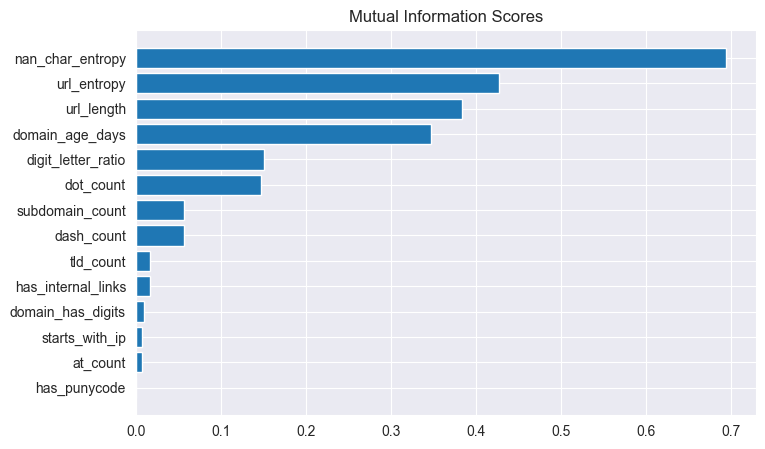

In [8]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

The entropy of a URL refers to the measure of randomness or unpredictability in the URL's structure, often used to assess how difficult it is to guess or brute-force a URL. Entropy, in information theory, quantifies the amount of uncertainty or "surprise" in a string, like a URL, and is often expressed in bits.

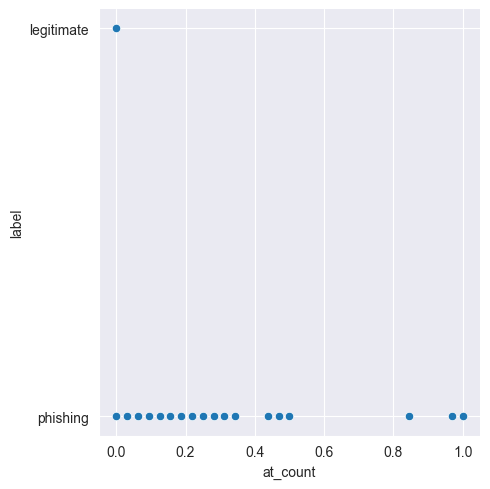

In [9]:
sns.relplot(x='at_count', y='label', data=df)

In [10]:
get_df_info(df)


Shape of DataFrame: (2499992, 15)

Columns in DataFrame: ['label', 'url_length', 'starts_with_ip', 'url_entropy', 'has_punycode', 'digit_letter_ratio', 'dot_count', 'at_count', 'dash_count', 'tld_count', 'domain_has_digits', 'subdomain_count', 'nan_char_entropy', 'has_internal_links', 'domain_age_days']

Data types of columns:
 label                  object
url_length            float64
starts_with_ip          int64
url_entropy           float64
has_punycode            int64
digit_letter_ratio    float64
dot_count             float64
at_count              float64
dash_count            float64
tld_count             float64
domain_has_digits       int64
subdomain_count       float64
nan_char_entropy      float64
has_internal_links      int64
domain_age_days       float64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499992 entries, 0 to 2499991
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              ----

,count,mean,std,min,25%,50%,75%,max
url_length,2499992.0,0.001641,0.002906,0.0,0.000509,0.000980,0.001881,1.0
starts_with_ip,2499992.0,0.010687,0.102825,0.0,0.000000,0.000000,0.000000,1.0
url_entropy,2499992.0,0.640077,0.106880,0.0,0.563553,0.640729,0.710909,1.0
has_punycode,2499992.0,0.000840,0.028978,0.0,0.000000,0.000000,0.000000,1.0
digit_letter_ratio,2499992.0,0.005607,0.011763,0.0,0.000000,0.000000,0.006398,1.0
dot_count,2499992.0,0.010306,0.008229,0.0,0.004739,0.009479,0.014218,1.0
at_count,2499992.0,0.000357,0.004398,0.0,0.000000,0.000000,0.000000,1.0
dash_count,2499992.0,0.002301,0.005163,0.0,0.000000,0.000000,0.003106,1.0
tld_count,2499992.0,0.000604,0.006008,0.0,0.000000,0.000000,0.000000,1.0
domain_has_digits,2499992.0,0.109398,0.312138,0.0,0.000000,0.000000,0.000000,1.0
